In [2]:
# Taking a look at the distribution of Data and getting a feel how the data looks like 
from matplotlib import pyplot as plt 
import os.path
import pandas as pd 
import numpy as np

pat_data = pd.read_csv("data\kaggle_3m\data.csv")
pat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient                    110 non-null    object 
 1   RNASeqCluster              92 non-null     float64
 2   MethylationCluster         109 non-null    float64
 3   miRNACluster               110 non-null    int64  
 4   CNCluster                  108 non-null    float64
 5   RPPACluster                98 non-null     float64
 6   OncosignCluster            105 non-null    float64
 7   COCCluster                 110 non-null    int64  
 8   histological_type          109 non-null    float64
 9   neoplasm_histologic_grade  109 non-null    float64
 10  tumor_tissue_site          109 non-null    float64
 11  laterality                 109 non-null    float64
 12  tumor_location             109 non-null    float64
 13  gender                     109 non-null    float64

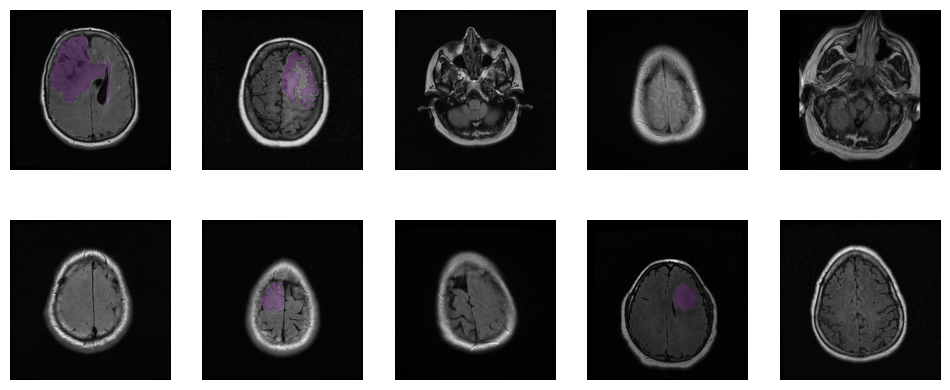

In [4]:
import random 

data_path = "D:\\Code\\ML Projects\\brain tumor segmentation LGG\\data\\kaggle_3m\\"
# visual inspection of random samples and their labels 
image_paths = os.listdir(data_path)
#image = plt.imread("")
image_paths = [x for x in image_paths if 'TCGA' in x ]

def display_images(img_path, num_images = 10):
    images = []
    labels = []
    patients = random.sample(img_path, k= num_images)

    # pick a random image, one per patient
    for pat in patients:
        # random image number
        pat_img_dir = data_path + pat
        pat_list = os.listdir(pat_img_dir)
        ran = random.choice(range(1, int(len(pat_list)/2)))
        temp_img = [x for x in pat_list if ('_' + str(ran) + '.tif') in x]
        temp_label = [x for x in pat_list if ('_' + str(ran) + '_mask.tif') in x]
        images.append(pat_img_dir + '\\' + temp_img[-1])
        labels.append(pat_img_dir + '\\' + temp_label[-1])

    fig = plt.figure(figsize=(12,5))
    rows = 2
    columns = 5
    for i in range (1, num_images+1):
        img = plt.imread(images[i-1])
        label = plt.imread(labels[i-1])
        label = np.ma.masked_where(label == 0, label)  # turns all zero pixels transparent 
        fig.add_subplot(rows, columns, i)
        plt.axis('off')
        plt.imshow(img[:, :, 1], cmap=plt.cm.gray)  # choose the modality mode here
        plt.imshow(label, interpolation='none', alpha=0.4)
    plt.show()

    return images, labels

images, labels = display_images(image_paths)
#images

In [9]:
from glob import glob
test = glob("D:\\Code\\ML Projects\\brain tumor segmentation LGG\\data\\kaggle_3m\\*\\*.tif") 
print("number of images: ", len(test)/2)

number of images:  3929.0


In [7]:
# extract unique label and label count
def get_num_data(csv_data, data_col):
    temp_data = csv_data[data_col].dropna().tolist()
    val, count = np.unique(temp_data, return_counts=True)

    return temp_data, val, count

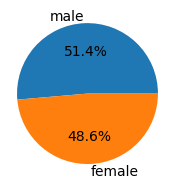

In [15]:
# gender distribution
gender, val, count = get_num_data(pat_data, 'gender')
label = ["male", "female"]
plt.figure(figsize=(2,2))
plt.pie(count, labels=label, autopct='%0.1f%%')
plt.axis('equal')
plt.show()

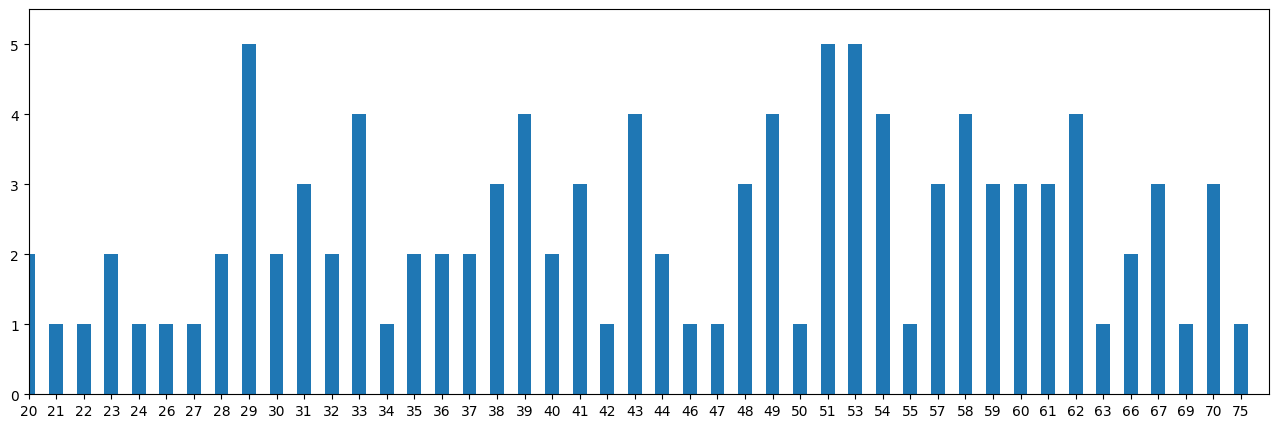

In [16]:
# distribution of age_at_initial_pathologic finding
pat_age, value, count= get_num_data(pat_data, 'age_at_initial_pathologic')
value = list(map(int, value))
plt.figure(figsize=(16,5))
plt.bar(range(len(count)), count, width=0.5)
plt.axis([0, 45, 0, 5.5])
ax = plt.subplot()
ax.set_xticks(range(len(count)))
ax.set_xticklabels(value)

plt.show()

In [6]:
kiki = [3,2,1,4,12]

kiki = kiki[::-1]
kiki

[12, 4, 1, 2, 3]